# Learning Laplacian eigenfunctions in three dimensions

In [1]:
# Load libraries
import logging

import matplotlib.pyplot as plt
import numpy as np

from klap import (
    ExponentialKernel,
    GaussianKernel,
    PolynomialKernel,
)
from klap.datasets.helper import (
    meshgrid_3d,
    plot_sphere_surface,
    spherical_harmonic,
)

# Set logger
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(levelname)s %(message)s",
)

#### Generate data 

In [2]:
np.random.seed(100)
n = 10000
p = 500

# Learn spherical harmonics
x = np.random.randn(n, 3)
x /= np.sqrt(np.sum(x**2, axis=1))[:, np.newaxis]
X, Y, Z = meshgrid_3d(100)

#### Choose a kernel

In [3]:
kernel = PolynomialKernel(d=4)
# kernel = ExponentialKernel(sigma=10)
# kernel = GaussianKernel(sigma=3)

#### Fit eigenfunctions

In [4]:
help(kernel.fit)

Help on method fit in module klap.kernels.kernel_laplacian:

fit(x, p=None, k=None, L_reg: float = 0, R_reg: float = 0, inverse_L: bool = False) method of klap.kernels.polynomial.PolynomialKernel instance
    Estimate Laplacian operator based on data.
    
    Parameters
    ----------
    x: ndarray of size (n, d)
        Data matrix
    p: int (optional, default is None)
        Number of representer points to use
    k: int (optional, default is None)
        Number of eigenvalues to compute. If None, k will be taken as self.k (default is 16)
    L_reg: float (optional, default is 0)
        Regularization parameter for Laplacian matrix
    R_reg: float (optional, default is 0)
        Regularization parameter for Nystrom matrix
    inverse_L: bool (optional, default is False)
        Either to inverse L or R in the GEVD system.
    
    Returns
    -------
    lambdas: ndarray of size (k,)
        Eigenvalues of the Laplacian operator
    alphas: ndarray of size (p, k)
        Eige

In [5]:
kernel.fit(x, p=p, k=25, L_reg=0, R_reg=0, inverse_L=True)

2023-03-22 10:34:25,743 INFO Dot product kernel computation
2023-03-22 10:34:26,341 INFO Inversing L
2023-03-22 10:34:26,353 INFO Matrix is not sdp.
2023-03-22 10:34:26,354 INFO Setting regularizer to 2.758e-11


#### Get eigenfunctions / features map

In [6]:
x_test = np.vstack((X.flatten(), Y.flatten(), Z.flatten())).T
phi = kernel(x_test)

#### Plot eigenfunctions

In [7]:
num = 5
phi /= np.sqrt(np.mean(phi**2, axis=0))
phi_true, eigenvalues = spherical_harmonic(x_test, num**2, return_eigenvalues=True)
phi_true /= np.sqrt(np.mean(phi_true**2, axis=0))

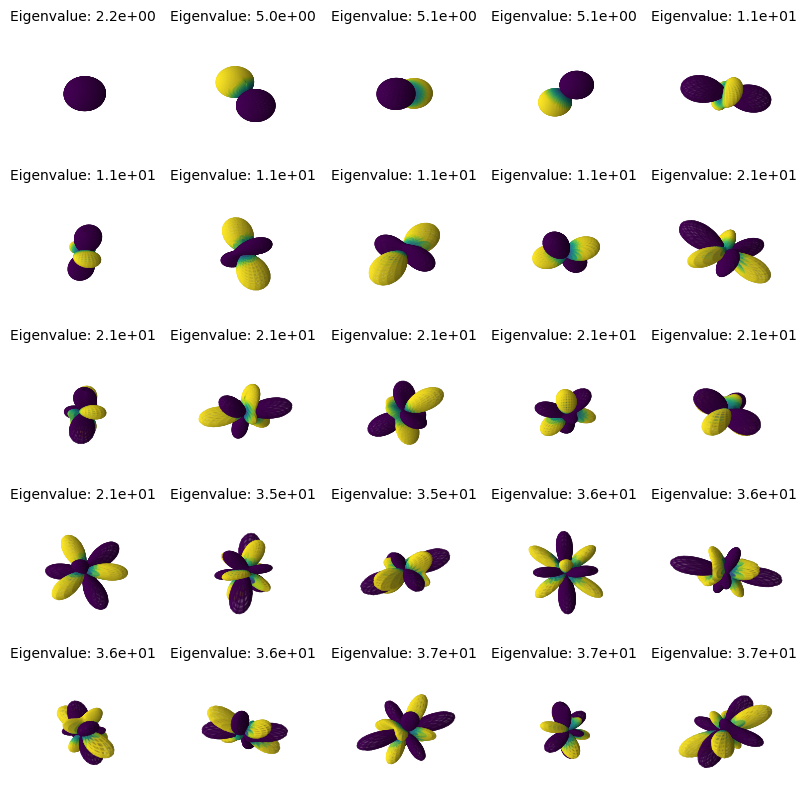

In [8]:
fig, axes = plt.subplots(num, num, figsize=(10, 10), subplot_kw={"projection": "3d"})
for i in range(num ** 2):
    phi_i = phi[:, i].reshape(*X.shape)
    Dx, Dy, Dz = np.abs(phi_i) * np.stack((X, Y, Z))
    plot_sphere_surface(axes[i//num, i%num], Dx, Dy, Dz, phi_i, alpha=.5, cmap="viridis")
    axes[i//num, i%num].set_title(f"Eigenvalue: {kernel.eigenvalues[i]:.1e}", fontsize=10)
    scale = 2
    axes[i//num, i%num].set_xlim([-scale, scale])
    axes[i//num, i%num].set_ylim([-scale, scale])
    axes[i//num, i%num].set_zlim([-scale, scale])

#### Show ground truth

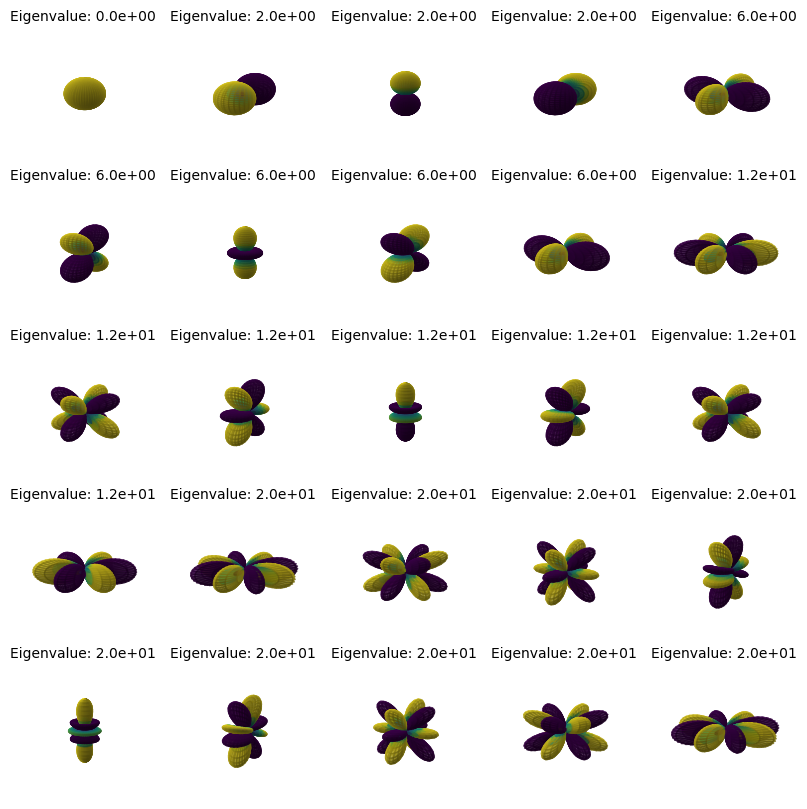

In [9]:
fig, axes = plt.subplots(num, num, figsize=(10, 10), subplot_kw={"projection": "3d"})
for i in range(num ** 2):
    phi_i = phi_true[:, i].reshape(*X.shape)
    Dx, Dy, Dz = np.abs(phi_i) * np.stack((X, Y, Z))
    plot_sphere_surface(axes[i//num, i%num], Dx, Dy, Dz, phi_i, alpha=.5, cmap="viridis")
    axes[i//num, i%num].set_title(f"Eigenvalue: {eigenvalues[i]:.1e}", fontsize=10)
    axes[i//num, i%num].view_init(azim=30, elev=15)
    scale = 2
    axes[i//num, i%num].set_xlim([-scale, scale])
    axes[i//num, i%num].set_ylim([-scale, scale])
    axes[i//num, i%num].set_zlim([-scale, scale])

#### Other visualization

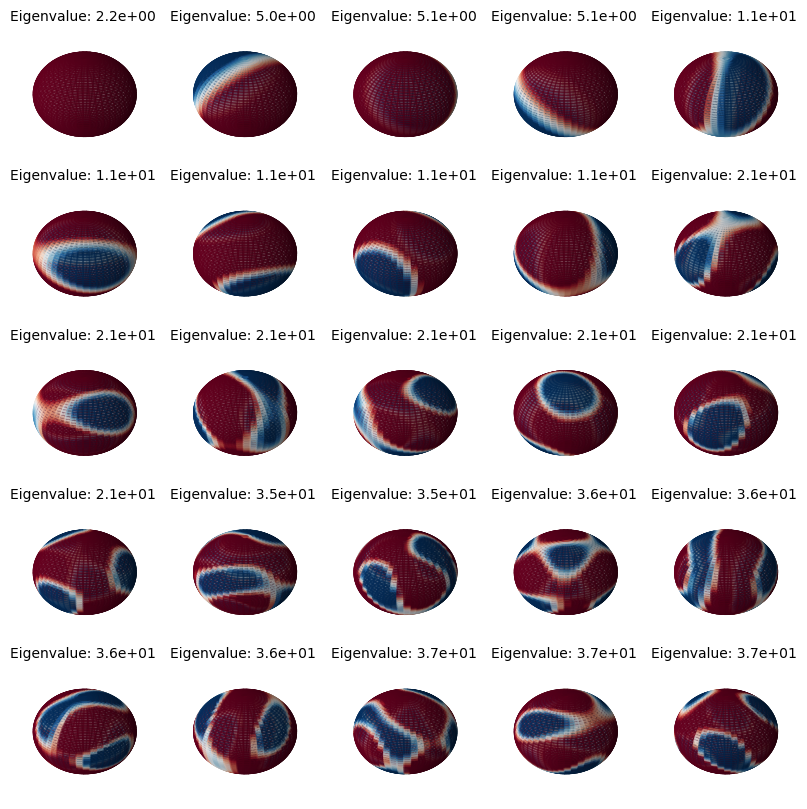

In [10]:
fig, axes = plt.subplots(num, num, figsize=(10, 10), subplot_kw={"projection": "3d"})
for i in range(num ** 2):
    plot_sphere_surface(axes[i//num, i%num], X, Y, Z, phi[:, i], alpha=.5)
    axes[i//num, i%num].set_title(f"Eigenvalue: {kernel.eigenvalues[i]:.1e}", fontsize=10)

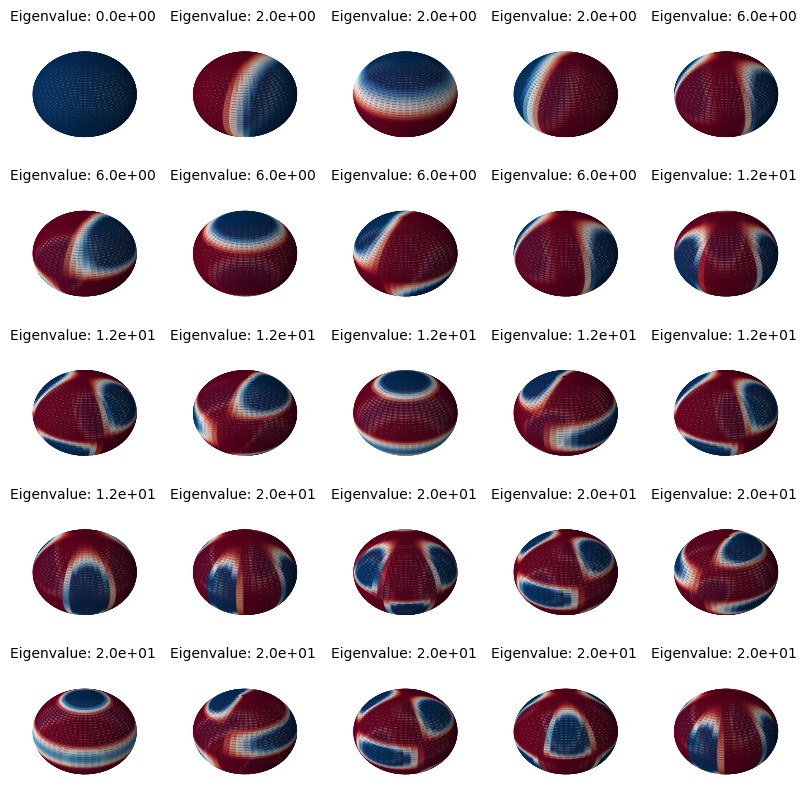

In [11]:
fig, axes = plt.subplots(num, num, figsize=(10, 10), subplot_kw={"projection": "3d"})
for i in range(num ** 2):
    plot_sphere_surface(axes[i//num, i%num], X, Y, Z, phi_true[:, i], alpha=.5)
    axes[i//num, i%num].set_title(f"Eigenvalue: {eigenvalues[i]:.1e}", fontsize=10)